In [81]:
# Import relevant libraries
import matplotlib.pyplot as plt
import mne
from mnelab.io import read_raw
import numpy as np
import pyxdf
import seaborn as sns
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
import os
import pyntbci

mne.set_log_level(verbose=False)
sns.set_context("paper", font_scale=1.5)

In [82]:
def get_target_labels(lsl_marker_stream):
    left_targets = []
    right_targets = []
    for timestamp, marker in zip(lsl_marker_stream['time_stamps'], lsl_marker_stream['time_series']):
            
        if marker[2] == 'left_shape_stim':
            target = marker[3].strip('""').split(';')[1].split('=')[1]
            left_targets.append(target)
        elif marker[2] == 'right_shape_stim':
            target = marker[3].strip('""').split(';')[1].split('=')[1]
            right_targets.append(target)

    left_targets = np.array(left_targets).astype("int")
    right_targets = np.array(right_targets).astype("int")

    # print("left_targets", left_targets.shape)
    # print("right_targets", right_targets.shape)

    # print("number left", np.sum(left_targets))
    # print("number right", np.sum(right_targets))

    # targets = left_targets + right_targets

    # print("number total", np.sum(targets))
    
    return left_targets, right_targets

def get_target_timestamps(lsl_marker_stream):
    left_timestamps = []
    right_timestamps = []
    
    for timestamp, marker in zip(lsl_marker_stream['time_stamps'], lsl_marker_stream['time_series']):
        print(f"{timestamp:.10f} {marker}")
        timestamp = np.floor(float(timestamp) * 1000) / 1000
        if marker[2] == 'left_shape_stim':
            left_timestamps.append(timestamp)
        elif marker[2] == 'right_shape_stim':
            right_timestamps.append(timestamp)

    left_timestamps = np.array(left_timestamps)
    right_timestamps = np.array(right_timestamps)

    # print(left_timestamps.shape)
    # print(right_timestamps.shape)
    
    return left_timestamps, right_timestamps

def get_new_event_matrix(events_old,raw_mne_obj,n_shapes=80):
    n_trials = events_old.shape[0]
    events_new = np.zeros((events_old.shape[0], n_shapes, 3), dtype=events_old.dtype)
    for i_trial in range(n_trials):
        for i_shape in range(n_shapes):
            events_new[i_trial, i_shape, 0] = events_old[i_trial, 0] + i_shape * int(.25 * raw_mne_obj.info['sfreq'])

    events_new = events_new.reshape((n_trials * n_shapes, 3))
    events_new[:, 2] = 1
    
    return events_new

def plot_response(target_Cz_avg, nontarget_Cz_avg, target_POz_avg, nontarget_POz_avg, raw_mne_obj, subject):
    time = np.arange(target_Cz_avg.shape[0]) / raw_mne_obj.info["sfreq"] - 0.25

    fig, ax = plt.subplots(2,1,figsize=(11.69,6), sharex=True, sharey=True)
    ax[0].plot(time,target_POz_avg,color='g',label='target')
    ax[0].plot(time,nontarget_POz_avg,color='r',label='nontarget')
    ax[0].set_title(f"{subject}: POz")
    ax[0].set_xlabel("time[s]")
    ax[0].set_ylabel("voltage [uV]")

    ax[1].plot(time,target_Cz_avg,color='g',label='target')
    ax[1].plot(time,nontarget_Cz_avg,color='r',label='nontarget')
    ax[1].set_title(f"{subject}: Cz")
    ax[1].set_xlabel("time[s]")
    ax[1].set_ylabel("voltage [uV]")

    ax[-1].set_xlabel('time [s]')
    ax[-1].legend()
    plt.tight_layout()

Stream 3: Calculated effective sampling rate 725.7609 Hz is different from specified rate 1000.0000 Hz.


events: (20, 3)


Stream 3: Calculated effective sampling rate 725.7609 Hz is different from specified rate 1000.0000 Hz.


labels: (20,)


Stream 2: Calculated effective sampling rate 725.5968 Hz is different from specified rate 1000.0000 Hz.


events: (20, 3)


Stream 2: Calculated effective sampling rate 725.5968 Hz is different from specified rate 1000.0000 Hz.


labels: (20,)


Stream 3: Calculated effective sampling rate 725.7496 Hz is different from specified rate 1000.0000 Hz.


events: (20, 3)


Stream 3: Calculated effective sampling rate 725.7496 Hz is different from specified rate 1000.0000 Hz.


labels: (20,)


Stream 2: Calculated effective sampling rate 727.0904 Hz is different from specified rate 1000.0000 Hz.


events: (20, 3)


Stream 2: Calculated effective sampling rate 727.0904 Hz is different from specified rate 1000.0000 Hz.


labels: (20,)


Stream 1: Calculated effective sampling rate 728.9164 Hz is different from specified rate 1000.0000 Hz.


events: (20, 3)


Stream 1: Calculated effective sampling rate 728.9164 Hz is different from specified rate 1000.0000 Hz.


labels: (20,)


Stream 1: Calculated effective sampling rate 736.8298 Hz is different from specified rate 1000.0000 Hz.


events: (20, 3)


Stream 1: Calculated effective sampling rate 736.8298 Hz is different from specified rate 1000.0000 Hz.


labels: (20,)


Stream 1: Calculated effective sampling rate 733.6107 Hz is different from specified rate 1000.0000 Hz.


events: (20, 3)


Stream 1: Calculated effective sampling rate 733.6107 Hz is different from specified rate 1000.0000 Hz.


labels: (20,)


Stream 3: Calculated effective sampling rate 731.3433 Hz is different from specified rate 1000.0000 Hz.


events: (20, 3)


Stream 3: Calculated effective sampling rate 731.3433 Hz is different from specified rate 1000.0000 Hz.


labels: (20,)


Stream 3: Calculated effective sampling rate 728.3497 Hz is different from specified rate 1000.0000 Hz.


events: (20, 3)


Stream 3: Calculated effective sampling rate 728.3497 Hz is different from specified rate 1000.0000 Hz.


labels: (20,)


Stream 3: Calculated effective sampling rate 723.2921 Hz is different from specified rate 1000.0000 Hz.


events: (20, 3)


Stream 3: Calculated effective sampling rate 723.2921 Hz is different from specified rate 1000.0000 Hz.


labels: (20,)


Stream 3: Calculated effective sampling rate 727.8700 Hz is different from specified rate 1000.0000 Hz.


events: (20, 3)


Stream 3: Calculated effective sampling rate 727.8700 Hz is different from specified rate 1000.0000 Hz.


labels: (20,)


Stream 3: Calculated effective sampling rate 725.4396 Hz is different from specified rate 1000.0000 Hz.


events: (20, 3)


Stream 3: Calculated effective sampling rate 725.4396 Hz is different from specified rate 1000.0000 Hz.


labels: (20,)


Stream 2: Calculated effective sampling rate 726.7125 Hz is different from specified rate 1000.0000 Hz.


events: (20, 3)


Stream 2: Calculated effective sampling rate 726.7125 Hz is different from specified rate 1000.0000 Hz.


labels: (20,)


Stream 3: Calculated effective sampling rate 729.5796 Hz is different from specified rate 1000.0000 Hz.


events: (20, 3)


Stream 3: Calculated effective sampling rate 729.5796 Hz is different from specified rate 1000.0000 Hz.


labels: (20,)


Stream 3: Calculated effective sampling rate 728.0842 Hz is different from specified rate 1000.0000 Hz.


events: (20, 3)


Stream 3: Calculated effective sampling rate 728.0842 Hz is different from specified rate 1000.0000 Hz.


labels: (20,)


Stream 3: Calculated effective sampling rate 730.9612 Hz is different from specified rate 1000.0000 Hz.


events: (20, 3)


Stream 3: Calculated effective sampling rate 730.9612 Hz is different from specified rate 1000.0000 Hz.


labels: (20,)


Stream 1: Calculated effective sampling rate 723.5335 Hz is different from specified rate 1000.0000 Hz.


events: (20, 3)


Stream 1: Calculated effective sampling rate 723.5335 Hz is different from specified rate 1000.0000 Hz.


labels: (20,)


Stream 3: Calculated effective sampling rate 727.2916 Hz is different from specified rate 1000.0000 Hz.


events: (20, 3)


Stream 3: Calculated effective sampling rate 727.2916 Hz is different from specified rate 1000.0000 Hz.


labels: (20,)


Stream 2: Calculated effective sampling rate 730.7161 Hz is different from specified rate 1000.0000 Hz.


events: (20, 3)


Stream 2: Calculated effective sampling rate 730.7161 Hz is different from specified rate 1000.0000 Hz.


labels: (20,)


Stream 1: Calculated effective sampling rate 727.1154 Hz is different from specified rate 1000.0000 Hz.


events: (20, 3)


Stream 1: Calculated effective sampling rate 727.1154 Hz is different from specified rate 1000.0000 Hz.


labels: (20,)


Stream 3: Calculated effective sampling rate 730.6681 Hz is different from specified rate 1000.0000 Hz.


events: (20, 3)


Stream 3: Calculated effective sampling rate 730.6681 Hz is different from specified rate 1000.0000 Hz.


labels: (20,)


Stream 3: Calculated effective sampling rate 727.9077 Hz is different from specified rate 1000.0000 Hz.


events: (20, 3)


Stream 3: Calculated effective sampling rate 727.9077 Hz is different from specified rate 1000.0000 Hz.


labels: (20,)


Stream 3: Calculated effective sampling rate 732.1229 Hz is different from specified rate 1000.0000 Hz.


events: (20, 3)


Stream 3: Calculated effective sampling rate 732.1229 Hz is different from specified rate 1000.0000 Hz.


labels: (20,)


Stream 3: Calculated effective sampling rate 728.9107 Hz is different from specified rate 1000.0000 Hz.


events: (20, 3)


Stream 3: Calculated effective sampling rate 728.9107 Hz is different from specified rate 1000.0000 Hz.


labels: (20,)


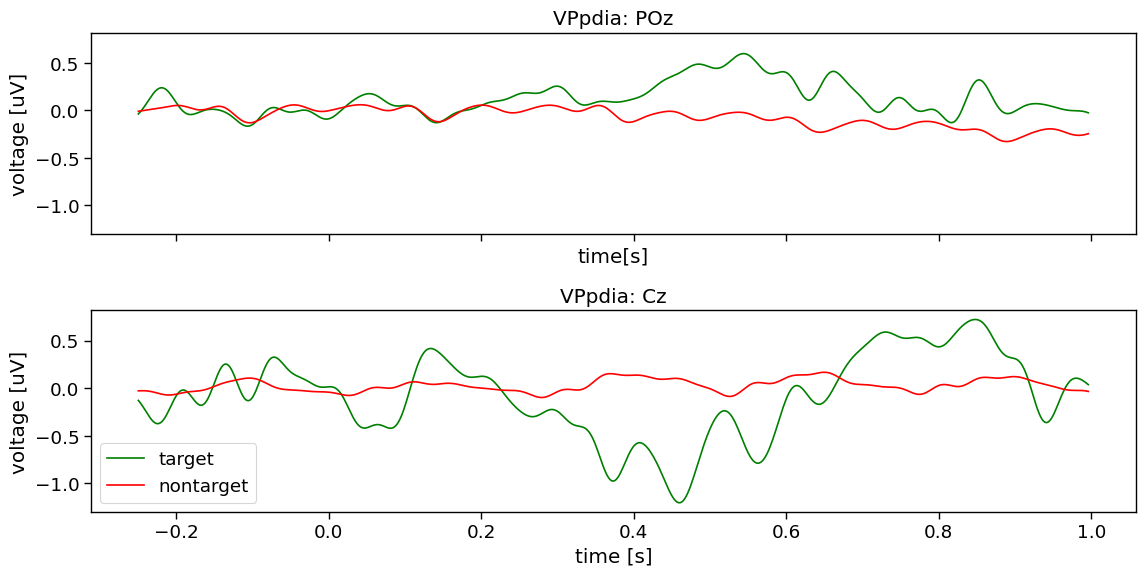

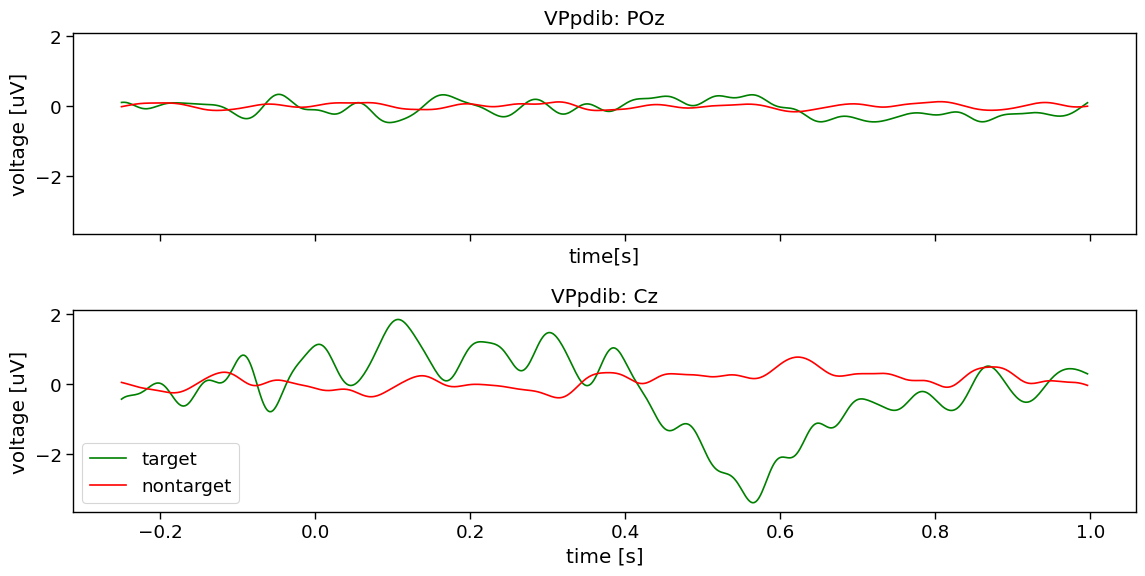

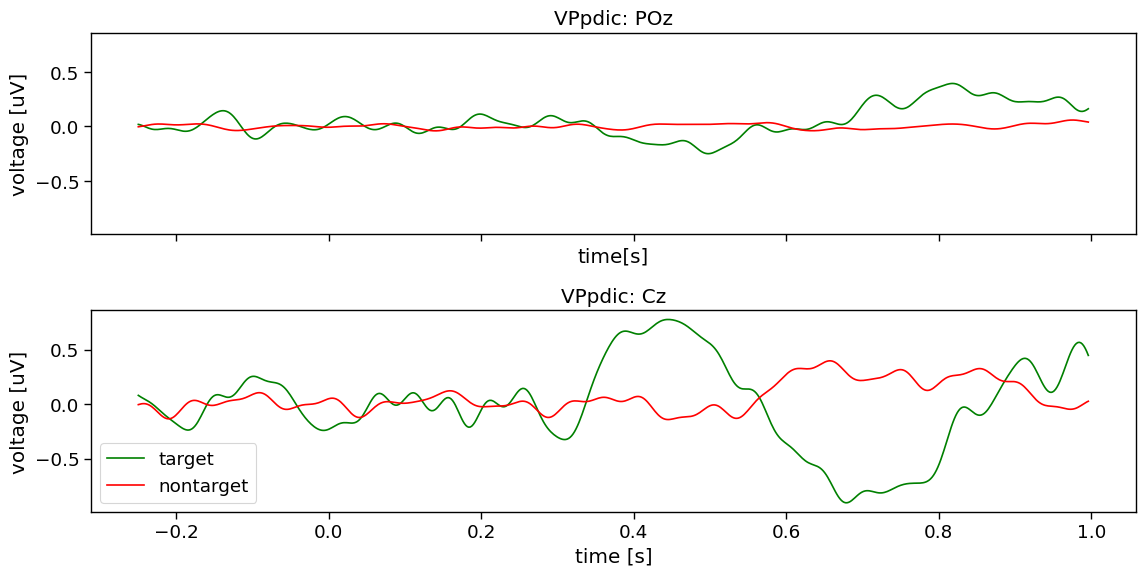

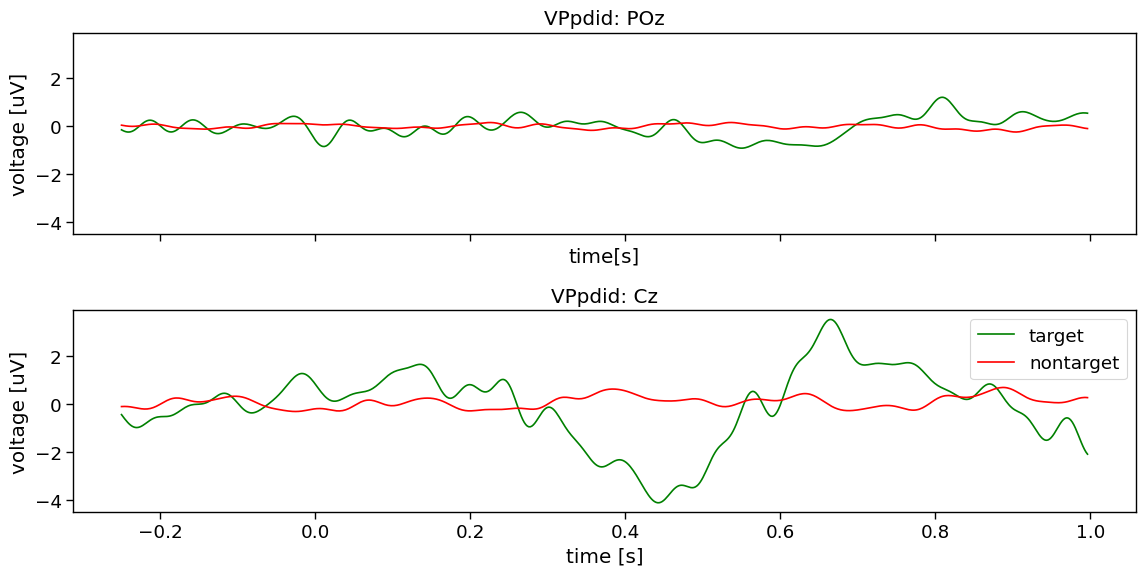

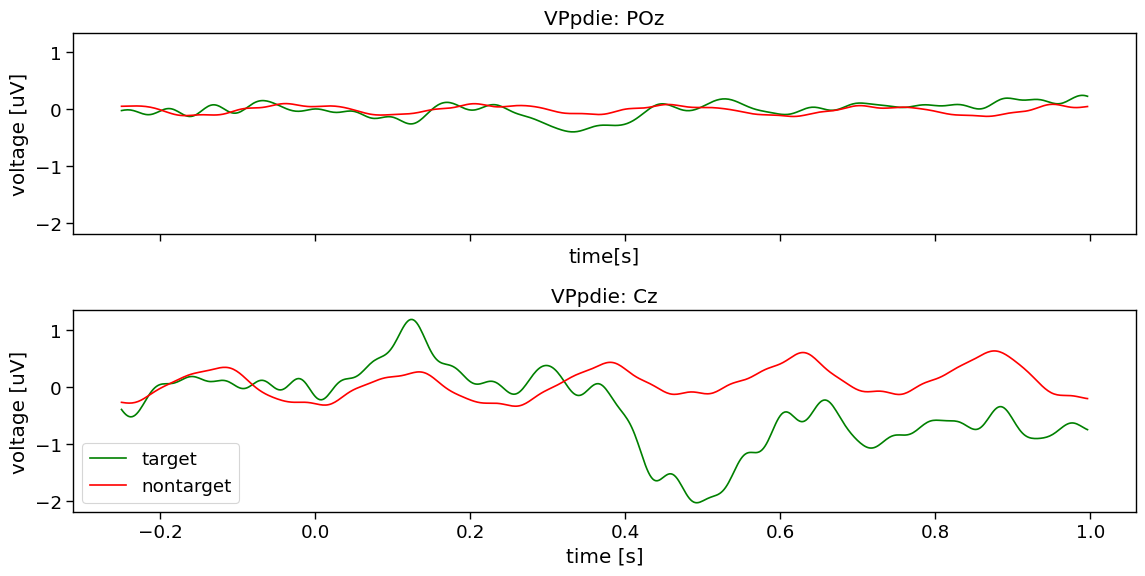

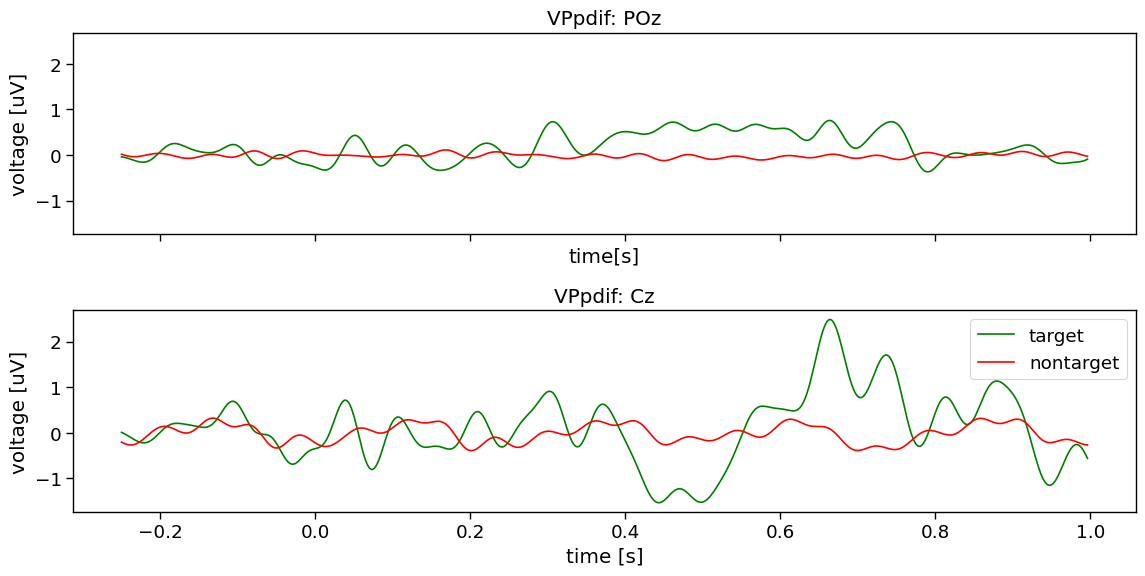

In [83]:
# paths
data_path = r'C:\Users\s1081686\Desktop\RA_Project\Scripts\pynt_codes\version_2\experiment_version_2\data_full_experiment' # path for raw data
codes_path = r'C:\Users\s1081686\Desktop\RA_Project\Scripts\pynt_codes\version_2\experiment_version_2\codes'


# subject and session
subjects = [f"VPpdi{letter}" for letter in 'abcdef'] # 5 subjects
ses = "ses-S001"
n_runs_covert = 4


# channel info
capfile = os.path.join(os.path.dirname(pyntbci.__file__), "capfiles", "biosemi64.loc")
with open(capfile, "r") as fid:
    channels_all = []
    for line in fid.readlines():
        channels_all.append(line.split("\t")[-1].strip())
        
# store eeg activity for targets and nontargets in selected channels
target_POz_all_runs = []
target_Cz_all_runs = []

nontarget_POz_all_runs = []
nontarget_Cz_all_runs = []

for subject in subjects:
    for i_run in range(n_runs_covert):

        # filename
        fn = rf"C:\Users\s1081686\Desktop\RA_Project\Scripts\pynt_codes\version_2\experiment_version_2\data_full_experiment\raw\sub-{subject}\ses-S001\eeg\sub-{subject}_{ses}_task-covert_run-00{i_run + 1}_eeg.xdf"

        fs = 120
        l_freq = 1
        h_freq = 20

        # Read EEG
        streams = pyxdf.resolve_streams(fn)
        names = [stream["name"] for stream in streams]
        stream_id = streams[names.index("BioSemi")]["stream_id"]
        raw = read_raw(fn, stream_ids=[stream_id])

        # Adjust marker channel data
        raw._data[0, :] = (raw._data[0, :] - np.median(raw._data[0, :])) > 0
        raw._data[0, :] = np.logical_and(raw._data[0, :], np.roll(raw._data[0, :], -1)).astype(raw._data[0, :].dtype)
        events = mne.find_events(raw, stim_channel="Trig1")
        print("events:", events.shape)

        # Spectral filter
        raw = raw.filter(l_freq=l_freq, h_freq=h_freq, picks=np.arange(1, 65), verbose=False)
                    
        # Read labels
        streams = pyxdf.load_xdf(fn)[0]
        names = [stream["info"]["name"][0] for stream in streams]
        marker_stream = streams[names.index("KeyboardMarkerStream")]
        labels = np.array([marker[3].lower().strip('""') == "right" 
                        for marker in marker_stream["time_series"]
                        if marker[2] == "cued_side"])
        print("labels:", labels.shape)
        
        # get labels for run
        left_targets_i_run, right_targets_i_run = get_target_labels(lsl_marker_stream=marker_stream)
        
        # append labels
        targets = left_targets_i_run + right_targets_i_run

        
        # get modified event matrix with onsets of all shape times within a run
        events_new = get_new_event_matrix(events_old=events,raw_mne_obj=raw)
        
        # Epoch data
        epo = mne.Epochs(raw, events=events_new, tmin=-0.25, tmax=1.0, baseline=[-0.25,0], picks="eeg", preload=True)
        eeg = epo.get_data(tmin=-.25, tmax=1.0) * 1e6
        
        # get target/non target eeg data for all channels
        target_avg = eeg[targets==1, :, :].mean(axis=0)
        nontarget_avg = eeg[targets==0, :, :].mean(axis=0)
        
        # get target/nontarget data for the POz/Cz
        target_POz_run_i = target_avg[channels_all.index("POz")]
        target_Cz_run_i = target_avg[channels_all.index("Cz")]
        
        nontarget_POz_run_i = nontarget_avg[channels_all.index("POz")]
        nontarget_Cz_run_i = nontarget_avg[channels_all.index("Cz")]
        
        if i_run == 0:
            target_POz_all_runs =  target_POz_run_i
            target_Cz_all_runs =  target_Cz_run_i
            
            nontarget_POz_all_runs =  nontarget_POz_run_i
            nontarget_Cz_all_runs =  nontarget_Cz_run_i
            
        else:
            target_POz_all_runs = np.vstack((target_POz_all_runs,target_POz_run_i))
            target_Cz_all_runs = np.vstack((target_Cz_all_runs,target_Cz_run_i))
            
            nontarget_POz_all_runs = np.vstack((nontarget_POz_all_runs,nontarget_POz_run_i))
            nontarget_Cz_all_runs = np.vstack((nontarget_Cz_all_runs,nontarget_Cz_run_i))      
    
    plot_response(target_Cz_avg=target_Cz_all_runs.mean(axis=0), 
                  nontarget_Cz_avg=nontarget_Cz_all_runs.mean(axis=0),
                  target_POz_avg=target_POz_all_runs.mean(axis=0),
                  nontarget_POz_avg=nontarget_POz_all_runs.mean(axis=0),
                  raw_mne_obj=raw,
                  subject=subject) 
    
    
    
    
    
    

In [ ]:
# target_Cz_all_runs = target_Cz_all_runs.mean(axis=0)
# nontarget_Cz_all_runs = nontarget_Cz_all_runs.mean(axis=0)

# target_POz_all_runs = target_POz_all_runs.mean(axis=0)
# nontarget_POz_all_runs = nontarget_POz_all_runs.mean(axis=0)


In [ ]:
# time = np.arange(target_Cz_all_runs.shape[0]) / raw.info["sfreq"] - 0.25

# fig, ax = plt.subplots(2,1,figsize=(11.69,6), sharex=True, sharey=True)
# ax[0].plot(time,target_POz_all_runs,color='g',label='target')
# ax[0].plot(time,nontarget_POz_all_runs,color='r',label='nontarget')
# ax[0].set_title("POz")
# ax[0].set_xlabel("time[s]")
# ax[0].set_ylabel("voltage [uV]")

# ax[1].plot(time,target_Cz_all_runs,color='g',label='target')
# ax[1].plot(time,nontarget_Cz_all_runs,color='r',label='nontarget')
# ax[1].set_title("Cz")
# ax[1].set_xlabel("time[s]")
# ax[1].set_ylabel("voltage [uV]")

# ax[-1].set_xlabel('time [s]')
# ax[-1].legend()
# plt.tight_layout()


